In [1]:
import os
import numpy as np
import pandas as pd
from os import listdir
from os.path import isfile, join
folder_path =r'20_newsgroups'
Folder_name = [f for f in listdir(folder_path)]
if '.DS_Store' in Folder_name:
    del Folder_name[0]
data = {}

for f_name in Folder_name:
    data[f_name] = []
    for file in os.listdir(os.path.join(folder_path,f_name)):
        with open(os.path.join(folder_path,f_name,file),encoding='latin-1') as opened_file:
            data[f_name].append(opened_file.read())
print(data[f_name])


['Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53028 talk.religion.misc:83510 talk.origins:40853\nPath: cantaloupe.srv.cs.cmu.edu!das-news.harvard.edu!noc.near.net!howland.reston.ans.net!wupost!crcnis1.unl.edu!moe.ksu.ksu.edu!hobbes.physics.uiowa.edu!news.iastate.edu!iscsvax.uni.edu!sunfish!charlie.usd.edu!RFOX\nNewsgroups: alt.atheism,talk.religion.misc,talk.origins\nSubject: Re: Albert Sabin\nMessage-ID: <C5p660.36t@sunfish.usd.edu>\nFrom: rfox@charlie.usd.edu (Rich Fox, Univ of South Dakota)\nDate: Sun, 18 Apr 1993 20:56:23 GMT\nReply-To: rfox@charlie.usd.edu\nSender: news@sunfish.usd.edu\nReferences: <1993Mar29.231830.2055@rambo.atlanta.dg.com>  \n <1993Apr7.073926.9874@engage.pko.dec.com> \n <1993Apr10.213547.17644@rambo.atlanta.dg.com> \n <1993Apr11.162936.18734@zeus.franklin.edu>,<1993Apr15.225657.17804@rambo.atlanta.dg.com>\nOrganization: The University of South Dakota Computer Science Dept.\nNntp-Posting-Host: charlie\nLines: 71\n\nIn article <1993Apr15.225657.17804@rambo.atlan

In [2]:
stopWords = ['a', 'about', 'above', 'after', 'again', 'against', 'all', 'am', 'an', 'and', 'any', 'are', "aren't", 'as', 'at',
 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 
 'can', "can't", 'cannot', 'could', "couldn't", 'did', "didn't", 'do', 'does', "doesn't", 'doing', "don't", 'down', 'during',
 'each', 'few', 'for', 'from', 'further', 
 'had', "hadn't", 'has', "hasn't", 'have', "haven't", 'having', 'he', "he'd", "he'll", "he's", 'her', 'here', "here's",
 'hers', 'herself', 'him', 'himself', 'his', 'how', "how's",
 'i', "i'd", "i'll", "i'm", "i've", 'if', 'in', 'into', 'is', "isn't", 'it', "it's", 'its', 'itself',
 "let's", 'me', 'more', 'most', "mustn't", 'my', 'myself',
 'no', 'nor', 'not', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'ought', 'our', 'ours' 'ourselves', 'out', 'over', 'own',
 'same', "shan't", 'she', "she'd", "she'll", "she's", 'should', "shouldn't", 'so', 'some', 'such', 
 'than', 'that',"that's", 'the', 'their', 'theirs', 'them', 'themselves', 'then', 'there', "there's", 'these', 'they', "they'd", 
 "they'll", "they're", "they've", 'this', 'those', 'through', 'to', 'too', 'under', 'until', 'up', 'very', 
 'was', "wasn't", 'we', "we'd", "we'll", "we're", "we've", 'were', "weren't", 'what', "what's", 'when', "when's", 'where',
 "where's", 'which', 'while', 'who', "who's", 'whom', 'why', "why's",'will', 'with', "won't", 'would', "wouldn't", 
 'you', "you'd", "you'll", "you're", "you've", 'your', 'yours', 'yourself', 'yourselves', 
 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eight', 'nine', 'ten', 'hundred', 'thousand', '1st', '2nd', '3rd',
 '4th', '5th', '6th', '7th', '8th', '9th', '10th']

In [3]:
vocab={}
for i in range(len(data)): 
    for doc in data[Folder_name[i]]: 
        for word in doc.split(): 
            if word.lower() not in stopWords and len(word.lower()) >= 5:
                if word.lower() not in vocab:
                    vocab[word.lower()]=1
                else:
                    vocab[word.lower()]+=1

390177

In [4]:
import operator
sorted_vocab=sorted(vocab.items(),key=operator.itemgetter(1),reverse=True)

In [6]:
feature_list=[]
for key in sorted_vocab:
    feature_list.append(key[0])
feature_list=feature_list[0:2000]

In [7]:
Y=[] 
for i in range(len(data)):
    for doc in data[Folder_name[i]]:
        Y.append(Folder_name[i])
Y=np.array(Y)

In [8]:
Y

array(['talk.politics.mideast', 'talk.politics.mideast',
       'talk.politics.mideast', ..., 'talk.religion.misc',
       'talk.religion.misc', 'talk.religion.misc'], dtype='<U24')

In [9]:
df = pd.DataFrame(columns = feature_list)

for folder in Folder_name:
    for file in os.listdir(os.path.join(folder_path,folder)): 
        df.loc[len(df)] = np.zeros(len(feature_list))
        with open(os.path.join(folder_path,folder,file),encoding='latin-1') as opened_file:
            for word in opened_file.read().split():
                if word.lower() in feature_list:
                    df[word.lower()][len(df)-1] += 1 

In [10]:
X=df.values


# Using inbulit Sklearn model and finding the accuracy 

In [84]:
from sklearn.model_selection import train_test_split
X_data_train,X_data_test,Y_data_train,Y_data_test=train_test_split(X,Y,random_state=0,test_size=0.25)

In [85]:
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(X_data_train,Y_data_train)
Y_predict = clf.predict(X_data_test)


In [86]:
correct_label=0
for k in range(len(Y_predict)):
    if(Y_predict[k] == Y_data_test[k]) :
        correct_label +=1
        accuracy_1 = correct_label/len(Y_predict)
print("The Accuracy of the model is : "+str(accuracy_1*100))

The Accuracy of the model is : 84.02


# Finding the accuracy using Naive Bayes model from scrach 

In [15]:
def fit(x_train,y_train):
    result={}
    result["total_data"]=len(y_train)
    class_labels=set(y_train)
    for current_label in class_labels:
        result[current_label]={}
        current_rows=(y_train==current_label)
        x_train_current=x_train[current_rows]
        y_train_current=y_train[current_rows]
        total_words=0
        for i in range(len(feature_list)):
            result[current_label][feature_list[i]]=x_train_current[:,i].sum()
            total_words+=x_train_current[:,i].sum()
        result[current_label]["total_count"]=total_words
    return result

In [16]:
def predictSingleClass(x,dictionary):
    best_class=-1000
    best_prob=-1000
    firstRun=True
    possible_classes=dictionary.keys()
    for current_class in possible_classes:
        if current_class=="total_data":
            continue
        output=np.log(dictionary[current_class]["total_count"])-np.log(dictionary["total_data"])
        for i in range(len(feature_list)):
            current_word_count=dictionary[current_class][feature_list[i]]+1
            total_word_count=dictionary[current_class]["total_count"]+len(feature_list)
            current_word_probability=np.log(current_word_count)-np.log(total_word_count)
            for j in range(int(x[i])): 
                output+=current_word_probability
        
        current_class_probability=output
        if(firstRun==True or current_class_probability>best_prob):
            best_class=current_class
            best_prob=current_class_probability
        firstRun=False
    return best_class

In [17]:
def predict(X_test,dictionary):
    Y_pred=[]
    num = 0
    for x in X_test:
        Y_pred.append(predictSingleClass(x,dictionary))
    return Y_pred

In [87]:
dictionary=fit(X_data_train,Y_data_train)

In [88]:
y_pred=predict(X_data_test,dictionary)

In [89]:
correct_label=0
for k in range(len(y_pred)):
    if(y_pred[k] == Y_data_test[k]) :
        correct_label +=1
        accuracy_2 = correct_label/len(y_pred)
print("The Accuracy of the model is : "+str(accuracy_2*100))

The Accuracy of the model is : 84.26


In [90]:
accuracy_1*100

84.02

In [91]:
accuracy_2*100

84.26

In [92]:
l1=[]
l2=[1,2]
l1.append(accuracy_1*100)
l1.append(accuracy_2*100)
    

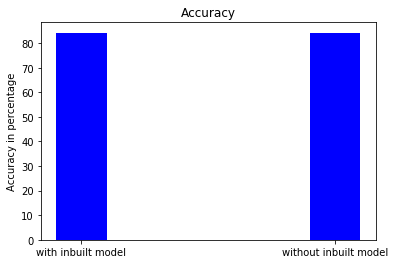

In [93]:
import matplotlib.pyplot as plt
plt.bar(["with inbuilt model","without inbuilt model"],l1, color ='blue',
        width = 0.2)

plt.title('Accuracy')
plt.ylabel('Accuracy in percentage')
plt.show()